# HR Analytics: Telco Customer Churn 
### Created By : Stefan Adrian Sitepu

## Business Problem Understanding

**Context**  
Sebuah perusahaan bernama Telco Company  yang bergerak dalam industri Telekomunikasi ingin melakukan analisa dan evaluasi terhadap Churn dari customer yang telah berlangganan. Churn pada Telco mengindikasikan suatu situasi dimana customer telah meninggalkan pelayanan dari provider tersebut. Sebuah dataset yang merepresentasikan profil customer yang telah meninggalkan Telco Company akan dianalisa agar dapat dilakukan rekomendasi untuk mengurangi churn tersebut.

Churn :

0 : Tidak meninggalkan Telco Company

1 : Meninggalkan Telco Company

**Problem Statement :**

Telco Company merupakan perusahaan yang bergerak pada bidan telekomunikasi, yang menyediakan pelayanan provider kepada customer, sehingga customer menjadi prioritas utama terutama untuk memperoleh profit. Semakin canggihnya industri teknologi, semakin banyak perusahaan yang juga memeberikan pelayanan yang sama sepert Telco namun dengan strategi bisnis yang berbeda, sehingga berdampak terhadap tingkat churn customer di Telco. 

Sehingga penting bagi Telco untuk melakukan evaluasi terhadap customer yang sudah meninggalkan Telco agar perusahaan tetap mempertahankan customer eksisting dan tentunya dapat meningkatkan customer baru untuk beralih ke Telco.


**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang customer akan/ingin tetap menggunakan pelayanan dari Telco atau tidak, sehingga dapat berfokus pada customer eksisting yang masih berlangganan pada Telco, dengan harapan akan meningkatkan customer baru kedepannya.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang customer ingin berlangganan dengan Telco atau tidak, sehingga mereka dapat membuat rencana yang lebih baik untuk meningkatkan customer baru kedepannya.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan customer yang mau tetap berlangganan dengan yang tidak.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang customer akan/ingin berlangganan pada Telco atau tidak.

**Metric Evaluation :**



![Alt text](../../Pictures/Screenshot%202023-02-18%20235921.png)

Type 1 error : False Positive  
Konsekuensi: potensi kehilangan customer

Type 2 error : False Negative  
Konsekuensi: sia-sianya biaya telekomunikasi kepada customer

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi cost biaya telekomunikasi kepada customer dari perusahaan tersebut, tetapi tanpa membuat menjadi berkurangnya customer potensial yang berlangganan. Jadi kita ingin sebanyak mungkin prediksi kelas negatif yang benar, dengan sesedikit mungkin prediksi false positive agar dapat menjaga customer untuk tetap berlangganan pada Telco Company.

Namun, model juga perlu memperhatikan false negative, karena dengan perusahaan mengeluarkan biaya telekomunikasi kepada customer yang akan churn merupakan pengeluarn biaya marekting yang sia-sia.

Jadi, model yang dicari adalah model yang memberikan prediksi akurat pada kelas positif dengan nilai Precision setinggi mungkin untuk menghindari kehilangan customer berpotensi loyal diikuti dengan nilai Recall yang juga harus sama tingginya untuk menghindari terbuangnya biaya yang dialokasikan. Maka metric utama yang akan kita gunakan adalah f1-score namun tetap memperhatikan nilai precision agar lebih tinggi dari recall. Selain itu, tujuan menggunakan f1-score adalah mengindikasikan bahwa model klasifikasi kita punya precision dan recall yang baik.

## Data Understanding

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Dependents | Text | Whether the customer has dependents or not |
| Tenure | Integer | Number of months the customer has stayed with the company |
| OnlineSecurity | Text | Whether the customer has online security or not |
| OnlineBackup | Text | Whether the customer has online backup or not |
| InternetService | Text | Whether the client is subscribed to Internet service |
| DeviceProtection | Text | Whether the client has device protection or not |
| TechSupport | Text | Whether the client has tech support or not  |
| Contract | Text | Type of contract according to duration |
| PaperlessBilling | Text | Bills issued in paperless form |
| MonthlyCharges | Float | Amount of charge for service on monthly bases |
| Churn | Text | Whether the customer churns or not |

In [1]:
# Library

import pandas as pd
import numpy as np
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler


# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [2]:
#Load Dataset
df = pd.read_csv('/Users/Stefan/Documents/Capstone 3/data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


## Data Cleaning

Sebelum data diolah, akan dilihat terlbih dahulu apakah pada dataset terdapat missing values. Pengecekan akan dilihat menggunakan info dari dataframe sebagai berikut:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


Pada hasil info dari DataFrame, dapat dilihat bahwa tidak terdapat missing values, sehingga proses dapat dilanjutkan. Namun DataType pada 'Churn' masih menunjukan 'object' dimana Column tersebut akan menjadi target dari model machine learning, sehingga DataType tersebut akan diubah menjadi angka 0 dan 1 untuk memprediksi 

0 = Tidak Churn
1 = Churn

In [4]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[25, 31]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes]"
4,InternetService,object,0,0.0,3,"[Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[No, No internet service]"
6,TechSupport,object,0,0.0,3,"[No internet service, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[50.2, 60.4]"


## Data Analysis

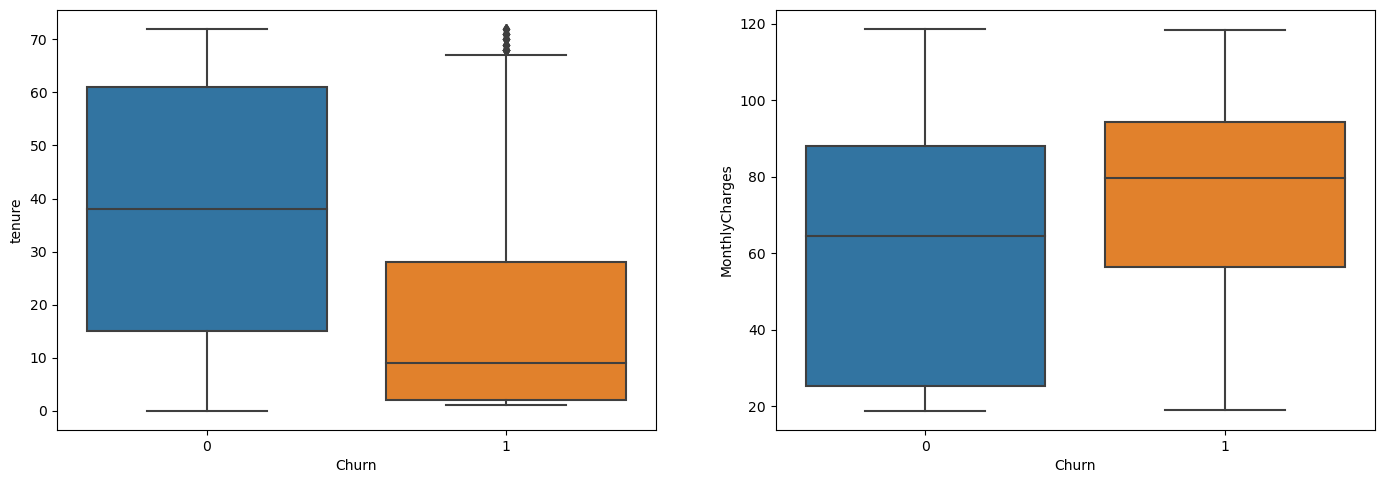

In [6]:
plt.figure(figsize=(17,12))

plt.subplot(223)
sns.boxplot(data=df,y='tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')
plt.show()

Berdasarkan dari nilai 'Tenure' yang merupakan jumlah bulan Customer berlangganan, menunjukan nilai rata-rata yang cukup jauh bagi customer yang tidak Churn dibandingkan Churn.

Sedangkan untuk 'MonthlyCharges' untuk customer yang tidak churn memiliki rata-rata yang lebih rendah, namun persebarannya lebih luas dibandingkan dengan customer yang Churn. 

Sehingga dapat dilihat bahwa 'MonthlyCharges' dan 'tenure' menunjukan pengaruh terhadap customer Churn maupun tidak Churn. 

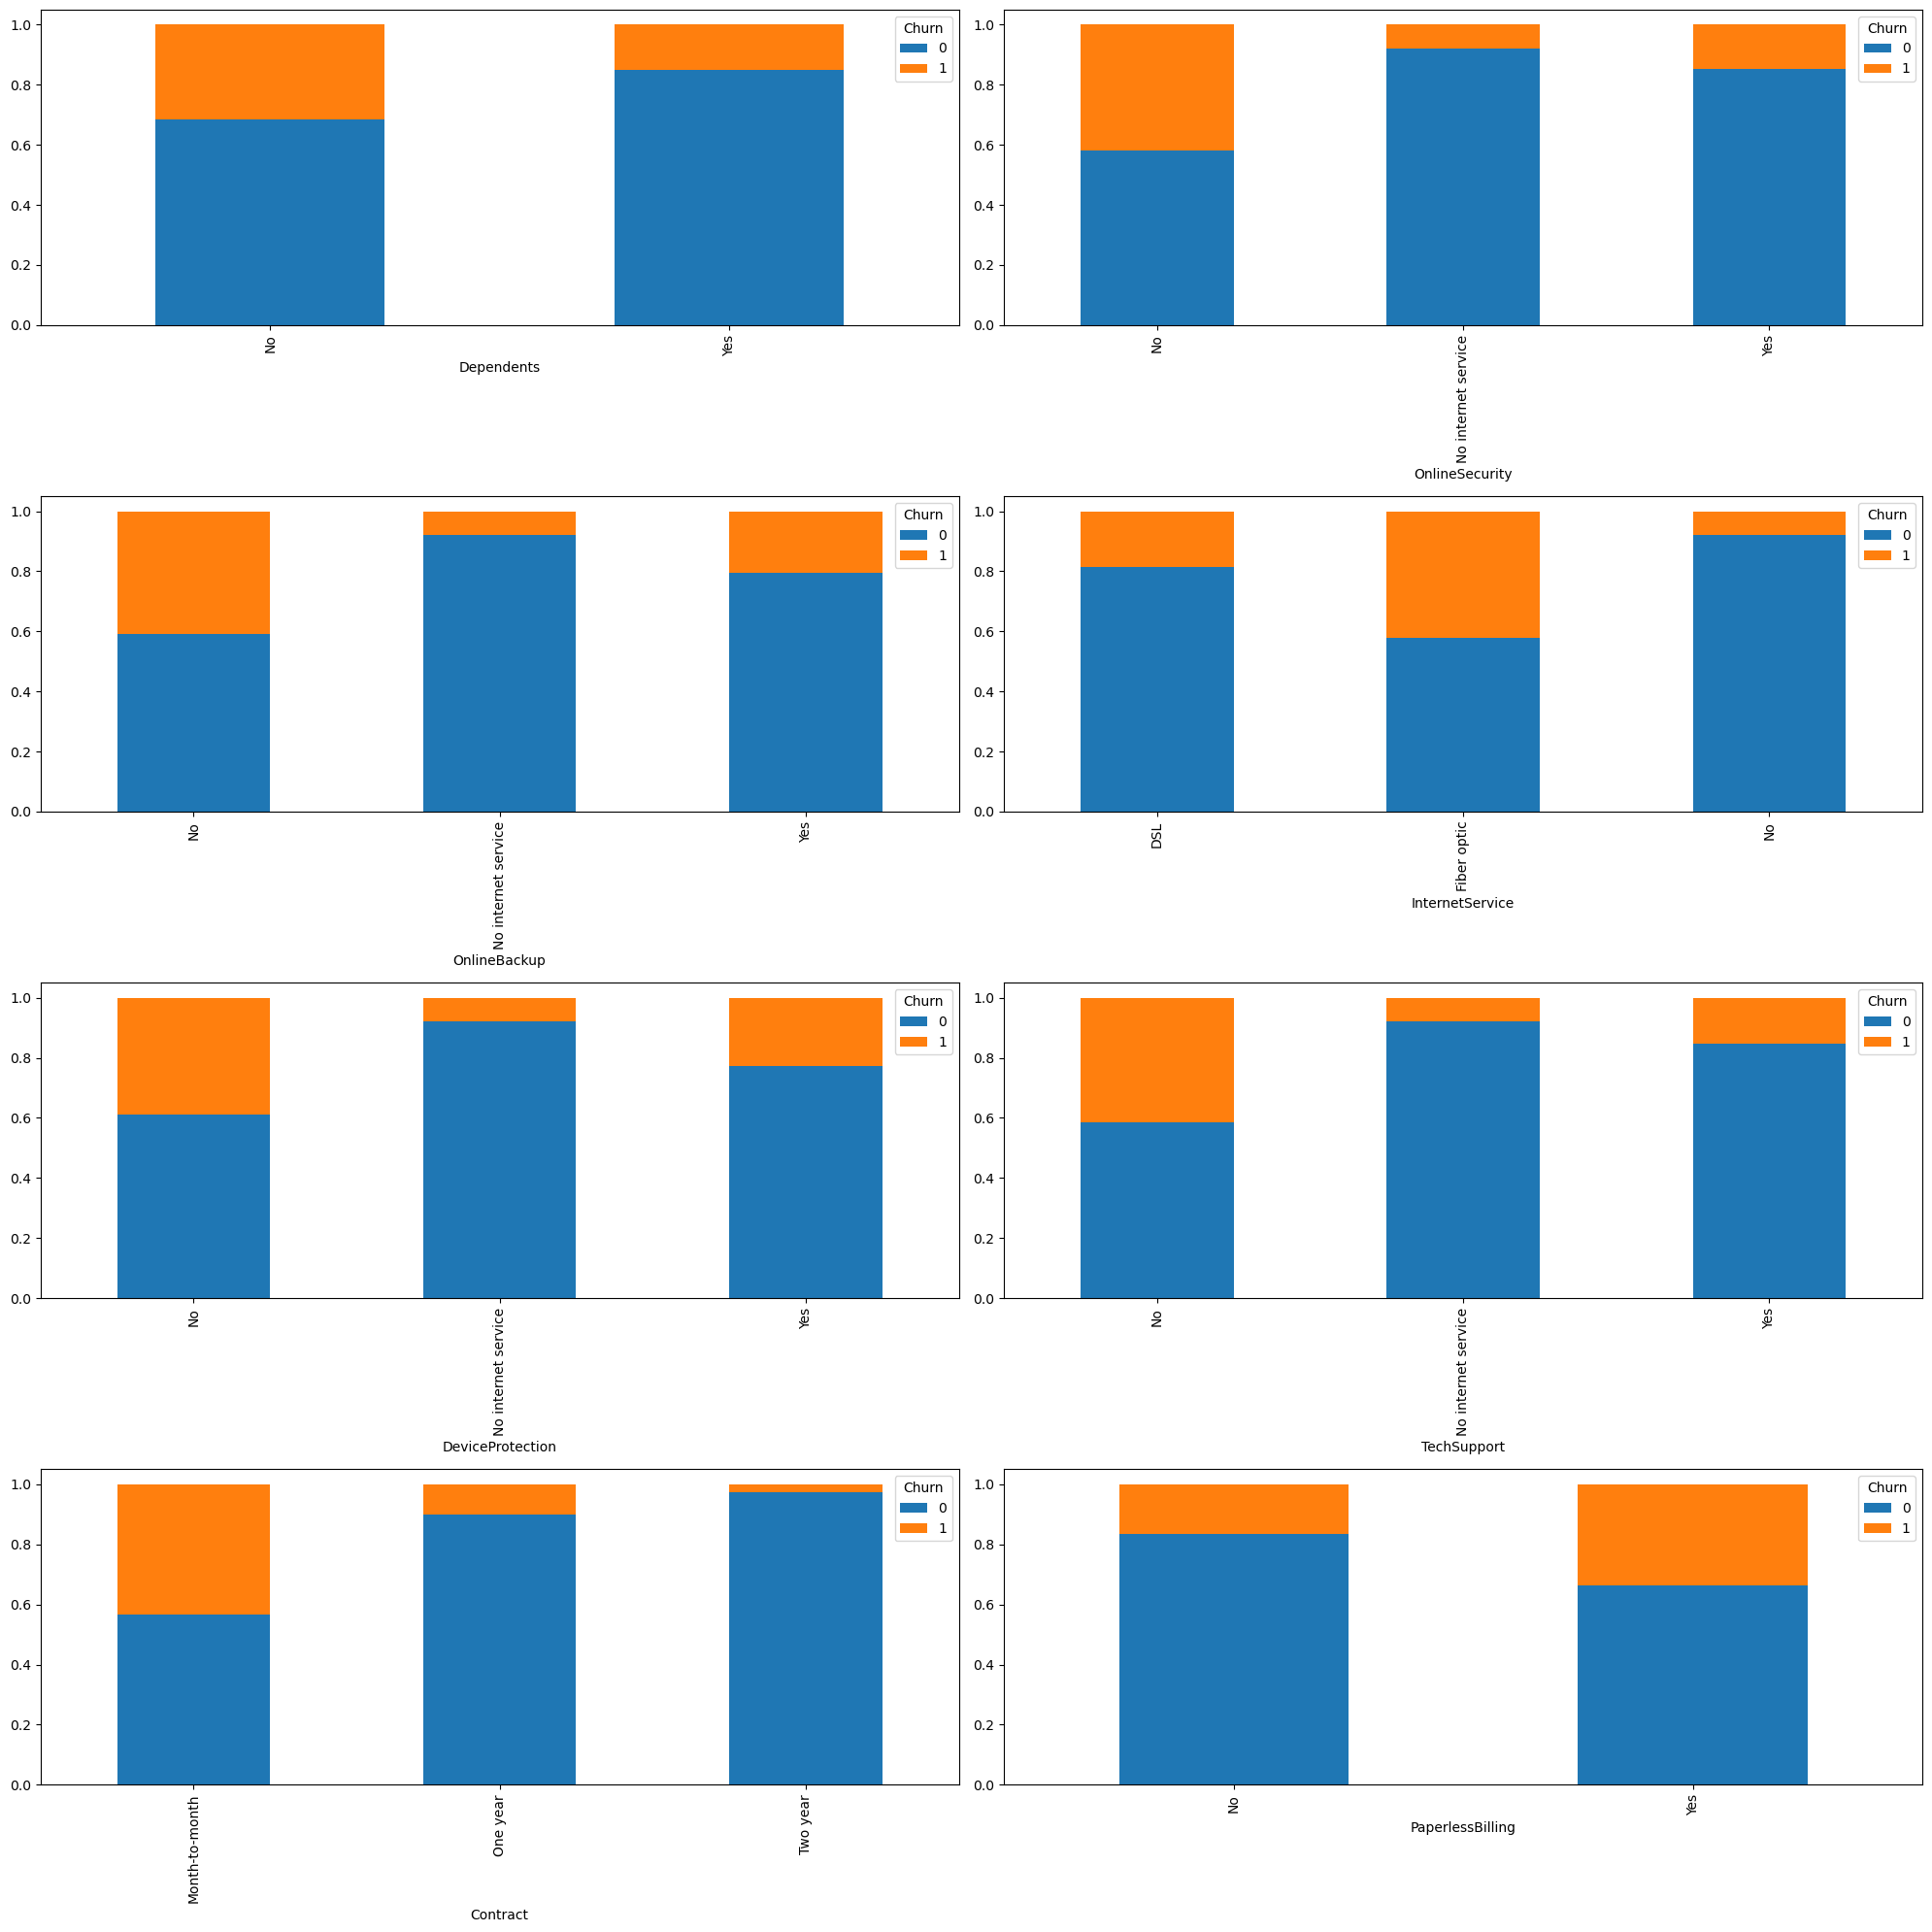

In [7]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [8]:
for i in df.drop(columns=['Churn','tenure','MonthlyCharges']).columns:
    relevent_experience_df = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False))

Churn,0,1
Dependents,,
No,0.683401,0.316599
Yes,0.848383,0.151617


Churn,0,1
OnlineSecurity,,
No,0.582004,0.417996
Yes,0.852059,0.147941
No internet service,0.922053,0.077947


Churn,0,1
OnlineBackup,,
No,0.592541,0.407459
Yes,0.795428,0.204572
No internet service,0.922053,0.077947


Churn,0,1
InternetService,,
Fiber optic,0.578269,0.421731
DSL,0.813599,0.186401
No,0.922053,0.077947


Churn,0,1
DeviceProtection,,
No,0.610704,0.389296
Yes,0.773641,0.226359
No internet service,0.922053,0.077947


Churn,0,1
TechSupport,,
No,0.586542,0.413458
Yes,0.848335,0.151665
No internet service,0.922053,0.077947


Churn,0,1
Contract,,
Month-to-month,0.567071,0.432929
One year,0.899240,0.100760
Two year,0.972342,0.027658


Churn,0,1
PaperlessBilling,,
Yes,0.664863,0.335137
No,0.835276,0.164724


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Customer yang tidak dependents cenderung untuk berpindah
2. Customer yang tidak memiliki OnlineSecurity cenderung untuk berpindah dibandingkan yang memiliki OnlineSecurity
3. Customer yang tidak memiliki OnlineBackup cenderung untuk berpindah dibandingkan yang memiliki OnlineBackup
4. Customer yang menggunakan InternetService berupa Fiber Optic cenderung untuk berpindah dibandingkan yang menggunakan InternetService berupa DSL
5. Customer yang tidak memiliki DeviceProtection cenderung untuk berpindah dibandingkan yang memiliki DeviceProtection
6. Customer yang tidak memiliki TechSupport cenderung untuk berpindah dibandingkan yang memiliki TechSupport
7. Customer yang berlangganan dengan Contract Month-to-Month cenderung untuk berpindah dibandingkan jeni Contract One Year dan Two Year
8. Customer yang memiliki PaperlessBilling cenderung untuk berpindah dibandingkan yang tidak memiliki PaperlessBilling

## Data Preparation

In [9]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


Kita akan melakukan preprocessing data dengan beberapa persyaratan, salah satunya dengan teknik encoding atau merubah tipe data objective ke bentuk numerik/ordinal. Berikut ini adalah penjabaran skema preprocessing yang akan kita lakukan :

Onehot encoding:
- Dependents: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (2)
- OnlineSecurity: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- OnlineBackup: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- InternetService: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- DeviceProtection: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- TechSupport: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- DeviceProtection: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- Contract: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (3)
- PaperlessBilling: tidak memiliki urutan/tidak ordinal pada tiap value, serta memiliki unique value yang sedikit (2)

Robust scalling :
- tenure: memiliki beberapa nilai outlier yang relatif banyak

MinMax scalling
- MonthlyCharges: tidak memiliki outlier yang begitu banyak

In [10]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [11]:
robust_scaler= Pipeline([
    ('imputer', IterativeImputer()),
    ('robust', RobustScaler())
])

minmax_scaler= Pipeline([
    ('imputer', IterativeImputer()),
    ('minmax', MinMaxScaler())
])

In [12]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Dependents','OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling','Contract']),
    ('minmax', minmax_scaler, ['MonthlyCharges']),
    ('robust', robust_scaler, ['tenure'])
], remainder='passthrough')

In [13]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2021)

## Modeling & Evaluation

In [15]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

### Model Benchmarking : K-Fold

In [16]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

,mean f1,sdev
model,,
Logistic Regression,0.590942,0.014968
XGBoost,0.569288,0.011251
LightGBM,0.559291,0.018244
Random Forest,0.552215,0.012793
KNN,0.546512,0.022850
Decision Tree,0.503356,0.018975


Berdasarkan f1 Score dari Training Test dapat dilihat bahwa Model Logistic Regression menunjukan performa yang paling baik

## Model Benchmarking: Test Data

In [17]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_f1.append(f1_score(y_test,y_pred))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       723
           1       0.64      0.51      0.56       263

    accuracy                           0.79       986
   macro avg       0.74      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986

KNN 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       723
           1       0.60      0.49      0.54       263

    accuracy                           0.78       986
   macro avg       0.71      0.69      0.70       986
weighted avg       0.76      0.78      0.77       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       723
           1       0.48      0.48      0.48       263

    accuracy                           0.72       986
   macro avg       0.65      0.65      0.65       986
weighted avg       0.72      0

,f1 score
model,
Logistic Regression,0.564756
LightGBM,0.558045
Random Forest,0.551020
XGBoost,0.538922
KNN,0.538622
Decision Tree,0.481061


Berdasarkan dari hasil Test Data, f1 Score pada Logistic Regression juga menunjukan model yang paling tinggi. Namun penulis merasa bahwa skor masih cukup rendah, yang dapat diakibatkan dengan adanya imbalanced data, sehingga model akan ditinjau kembali dengan menggunanan metode Oversampling dengan SMOTE dan Undersampling dengan Near Miss.

## Oversampling (SMOTE)

In [18]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    smote= SMOTE(random_state=2020)
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

,mean f1,sdev
model,,
Logistic Regression,0.627758,0.004280
LightGBM,0.615788,0.011260
XGBoost,0.589621,0.030940
Random Forest,0.579497,0.021194
KNN,0.576966,0.021000
Decision Tree,0.535509,0.013468


In [19]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    smote= SMOTE(random_state=2020)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', smote),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_f1.append(f1_score(y_test,y_pred))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       723
           1       0.50      0.74      0.60       263

    accuracy                           0.74       986
   macro avg       0.70      0.74      0.70       986
weighted avg       0.78      0.74      0.75       986

KNN 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       723
           1       0.51      0.70      0.59       263

    accuracy                           0.74       986
   macro avg       0.69      0.73      0.70       986
weighted avg       0.78      0.74      0.75       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       723
           1       0.54      0.61      0.57       263

    accuracy                           0.76       986
   macro avg       0.70      0.71      0.70       986
weighted avg       0.77      0

,f1 score
model,
XGBoost,0.623009
LightGBM,0.616438
Logistic Regression,0.600000
Random Forest,0.593807
KNN,0.592949
Decision Tree,0.574506


Pada hasil dari Oversampling, model XGBoost dan LightGBM menunjukan performa nilai paling baik dibandingkan dengan Logistic Regression. Hal ini masuk akal karena pada tahap Oversampling kita menambah Class Positive sehingga Recall mengalami peningkatan dan Precision mengalami penurunan. Dari hasil sebelum di Oversampling dan setelah di Oversampling

Logistic Regression

Not Churn (0)
- Precision : 0.83 -> 0.89
- Recall : 0.90 -> 0.73

Churn (1)
- Precision : 0.64 -> 0.50
- Recall : 0.51 -> 0.74

XGBoost

Not Churn (0)
- Precision : 0.83 -> 0.87
- Recall : 0.86 -> 0.83

Churn (1)
- Precision : 0.57 -> 0.58
- Recall : 0.51 -> 0.67

LightGBM

Not Churn (0)
- Precision : 0.83 -> 0.88
- Recall : 0.87 -> 0.80

Churn (1)
- Precision : 0.60 -> 0.56
- Recall : 0.52 -> 0.68

Apabila kita melihat dari perubahan diatas, memang XGBoost memiliki perubahan Precision dan Recall yang paling stabil dibandingkan Logistic Regression.

## Undersampling

In [20]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    nearmiss=NearMiss()
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', nearmiss),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1':rata,'sdev':std}).set_index('model').sort_values(by='mean f1',ascending=False)

,mean f1,sdev
model,,
Logistic Regression,0.535669,0.022366
KNN,0.431121,0.027587
LightGBM,0.417733,0.023023
XGBoost,0.404136,0.015139
Random Forest,0.392459,0.021051
Decision Tree,0.385973,0.020828


In [21]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    nearmiss=NearMiss()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('resampling', nearmiss),
        ('model',i)])
    x_train,x_test
    
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_f1.append(f1_score(y_test,y_pred))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77       723
           1       0.45      0.69      0.55       263

    accuracy                           0.69       986
   macro avg       0.66      0.69      0.66       986
weighted avg       0.75      0.69      0.71       986

KNN 
               precision    recall  f1-score   support

           0       0.79      0.53      0.64       723
           1       0.32      0.61      0.42       263

    accuracy                           0.55       986
   macro avg       0.56      0.57      0.53       986
weighted avg       0.66      0.55      0.58       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.72      0.39      0.50       723
           1       0.26      0.58      0.35       263

    accuracy                           0.44       986
   macro avg       0.49      0.48      0.43       986
weighted avg       0.59      0

,f1 score
model,
Logistic Regression,0.545181
KNN,0.421053
LightGBM,0.403734
XGBoost,0.388889
Random Forest,0.372041
Decision Tree,0.353900


Hasil dari Metode Undersampling menunjukan nilai f1 score yang lebih rendah dibandingkan dengan Oversampling, sehingga metode ini tidak akan dilanjutkan pada tahap selanjutnya.

Maka berdasarkan hasil dari Metode Oversampling model yang akan dicoba untuk Hyperparameter Tuning adalah XGBoost dan LightGBM.

### Hyperparameter Tuning

In [22]:
xgb = XGBClassifier()
smote= SMOTE(random_state=2020)
estimator_logxgb=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',xgb)])

In [23]:
lgbm = lgb.LGBMClassifier()
smote= SMOTE(random_state=2020)
estimator_lgbm=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',lgbm)])

In [24]:
estimator_logxgb.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['Dependents', 'OnlineSecurity',
                                     'OnlineBackup', 'InternetService',
                                     'DeviceProtection', 'TechSupport',
                                     'PaperlessBilling', 'Contract']),
                                   ('minmax',
                                    Pipeline(steps=[('imputer',
                                                     IterativeImputer()),
                                                    ('minmax', MinMaxScaler())]),
                                    ['MonthlyCharges']),
                                   ('robust',
                                    Pipeline(steps=[('imputer',
                                                     IterativeImputer()),
                                             

In [25]:
estimator_lgbm.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehot', OneHotEncoder(drop='first'),
                                    ['Dependents', 'OnlineSecurity',
                                     'OnlineBackup', 'InternetService',
                                     'DeviceProtection', 'TechSupport',
                                     'PaperlessBilling', 'Contract']),
                                   ('minmax',
                                    Pipeline(steps=[('imputer',
                                                     IterativeImputer()),
                                                    ('minmax', MinMaxScaler())]),
                                    ['MonthlyCharges']),
                                   ('robust',
                                    Pipeline(steps=[('imputer',
                                                     IterativeImputer()),
                                             

In [26]:
hyperparam_logxgb={'model__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
              'model__learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
              'model__n_estimators': [100, 250, 500, 750],
              'model__min_child_weight': [ 1, 3, 5, 7 ]}

hyperparam_lgbm={'model__num_leaves': [31, 21, 41, 51],
             'model__min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'model__reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'model__reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
             'model__learning_rate': [0.1, 0.075, 0.125, 0.05],
             'model__random_state': [42]}

In [27]:
grid_logxgb = GridSearchCV(estimator_logxgb, param_grid=hyperparam_logxgb, cv=skfold, scoring='f1', n_jobs=-1)

grid_lgbm = GridSearchCV(estimator_lgbm, param_grid=hyperparam_lgbm, cv=skfold, scoring='f1', n_jobs=-1)

In [28]:
grid_logxgb.fit(x_train,y_train)
print(grid_logxgb.best_score_)
print(grid_logxgb.best_params_)

0.6356831694950877
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_child_weight': 5, 'model__n_estimators': 250}


In [29]:
grid_lgbm.fit(x_train,y_train)
print(grid_lgbm.best_score_)
print(grid_lgbm.best_params_)

0.6401705393904249
{'model__learning_rate': 0.075, 'model__min_child_weight': 100.0, 'model__num_leaves': 31, 'model__random_state': 42, 'model__reg_alpha': 2, 'model__reg_lambda': 5}


### XGBoost Tuning Result

In [30]:
xgb = XGBClassifier()
smote= SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',xgb)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('XGBoost')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

XGBoost
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       723
           1       0.58      0.67      0.62       263

    accuracy                           0.78       986
   macro avg       0.73      0.75      0.74       986
weighted avg       0.80      0.78      0.79       986

f1 score: 0.6230088495575221


In [31]:
best_model_logxgb=grid_logxgb.best_estimator_
best_model_logxgb.fit(x_train,y_train)
y_pred=best_model_logxgb.predict(x_test)
print('XGBoost')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

XGBoost
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       723
           1       0.54      0.75      0.62       263

    accuracy                           0.76       986
   macro avg       0.71      0.76      0.72       986
weighted avg       0.80      0.76      0.77       986

f1 score: 0.6232114467408585


Perubahan f1 Score pada XGBoost before Tuning dan After Tuning

XGBoost : 0.6230 -> 0.6232

### LightGBM Tuning Result

In [32]:
lgbm = lgb.LGBMClassifier()
smote= SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',lgbm)])
estimator.fit(x_train, y_train)
y_pred=estimator.predict(x_test)
print('LightGBM')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

LightGBM
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       723
           1       0.56      0.68      0.62       263

    accuracy                           0.77       986
   macro avg       0.72      0.74      0.73       986
weighted avg       0.79      0.77      0.78       986

f1 score: 0.6164383561643836


In [33]:
best_model_lgbm=grid_lgbm.best_estimator_
best_model_lgbm.fit(x_train,y_train)
y_pred=best_model_lgbm.predict(x_test)
print('LightGBM')
print(classification_report(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

LightGBM
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       723
           1       0.52      0.75      0.61       263

    accuracy                           0.75       986
   macro avg       0.71      0.75      0.71       986
weighted avg       0.79      0.75      0.76       986

f1 score: 0.6139534883720931


Perubahan f1 Score pada LightGBM before Tuning dan After Tuning

LightGBM : 0.6164 -> 0.6139

## Confusion Matrix

Berdasarkan hasil dar Hyperparameter Tuning model yang dipilih adalah XGBoost karena memiliki peningkatan dan menunjukan f1-score yang lebih baik

### Before Tuning

In [34]:
xgb = XGBClassifier()
smote= SMOTE(random_state=2020)
estimator=Pipeline([
    ('preprocess',transformer),
    ('resampling',smote),
    ('model',xgb)])
y_train_pred = cross_val_predict(estimator, x_train, y_train, cv=skfold)
estimator.fit(x_train, y_train)
print ("XGBoost accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

XGBoost accuracy is 0.76


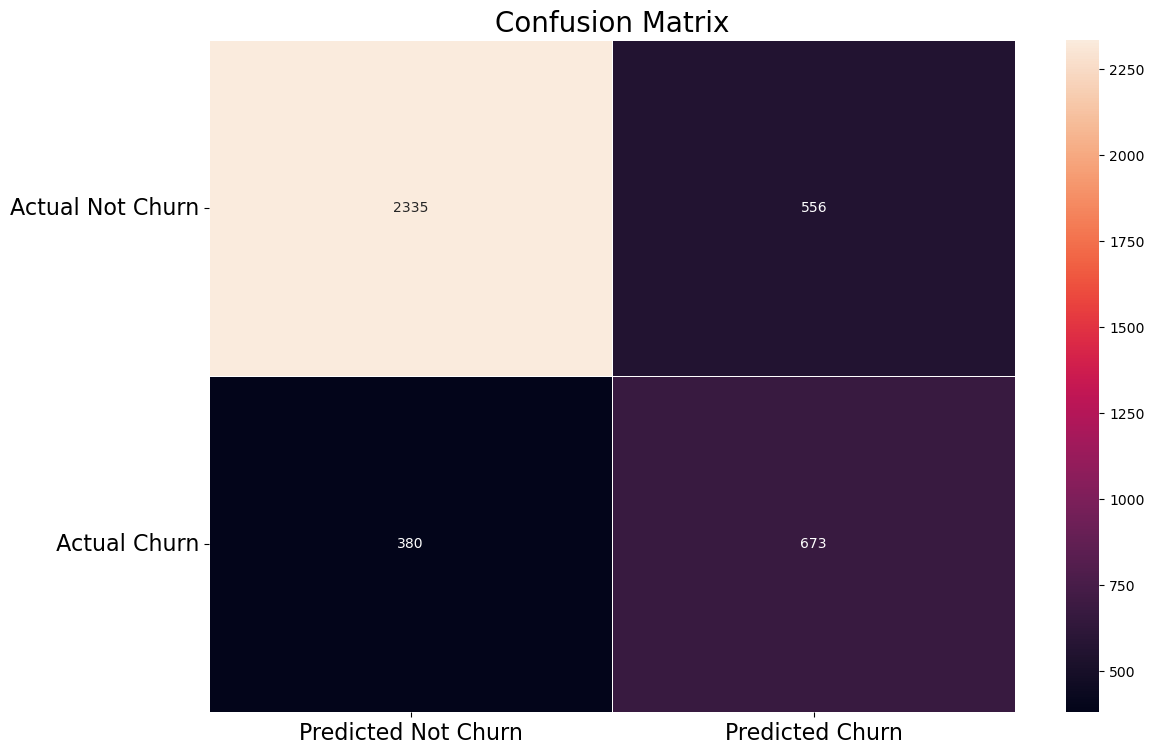

In [35]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Not Churn','Predicted Churn'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Not Churn', ' Actual Churn'], fontsize=16, rotation=360)
plt.show()

In [36]:
TN= round((2335/(3944)*100),0)
FP= round((556/(3944)*100),0)
FN= round((380/(3944)*100),0)
TP= round((673/(3944)*100),0)

In [37]:
print('Jumlah Customer dalam matriks TN:', TN,'orang')
print('Jumlah Customer dalam matriks FP:', FP,'orang')
print('Jumlah Customer dalam matriks FN:', FN,'orang')
print('Jumlah Customer dalam matriks TP:', TP,'orang')

Jumlah Customer dalam matriks TN: 59.0 orang
Jumlah Customer dalam matriks FP: 14.0 orang
Jumlah Customer dalam matriks FN: 10.0 orang
Jumlah Customer dalam matriks TP: 17.0 orang


### After Tuning

In [38]:
best_model_logxgb=grid_logxgb.best_estimator_
y_train_pred = cross_val_predict(best_model_logxgb, x_train, y_train, cv=skfold)
best_model_logxgb.fit(x_train, y_train)
print ("XGBoost accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

XGBoost accuracy is 0.76


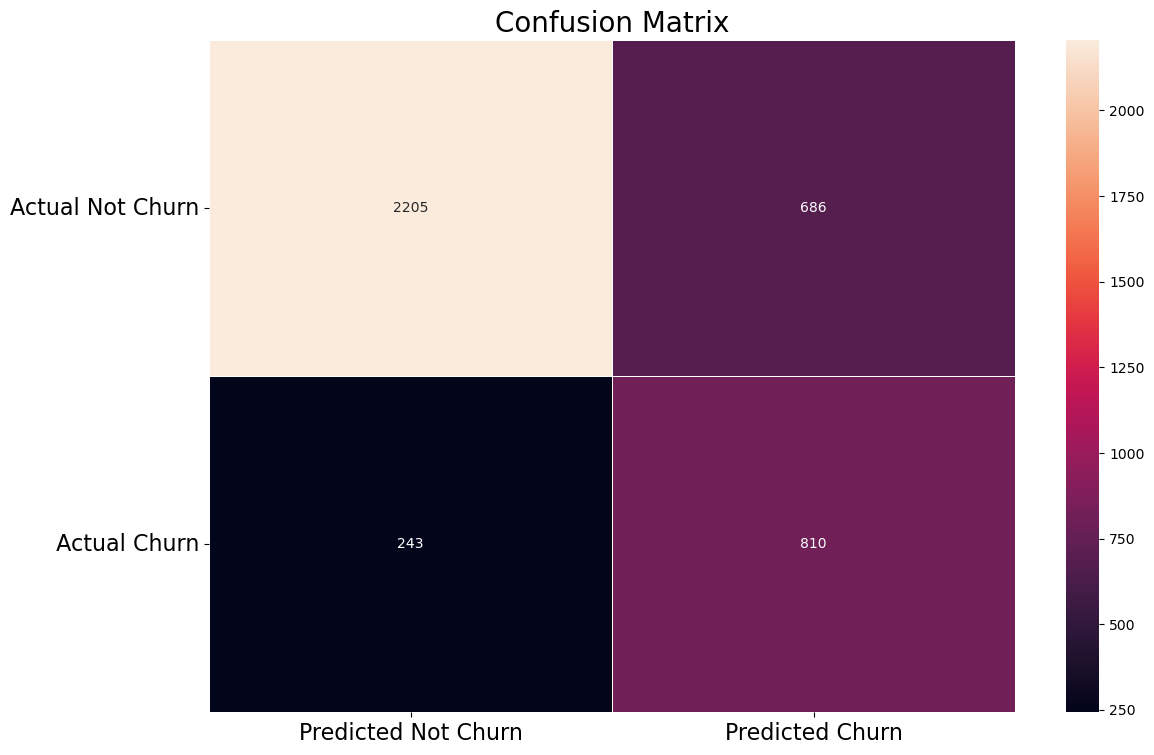

In [39]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predicted Not Churn','Predicted Churn'], fontsize=16, rotation=360)
ax.set_yticklabels(['Actual Not Churn', ' Actual Churn'], fontsize=16, rotation=360)
plt.show()

In [40]:
TN1= round((2205/(3944)*100),0)
FP1= round((686/(3944)*100),0)
FN1= round((243/(3944)*100),0)
TP1= round((810/(3944)*100),0)

In [41]:
print('Jumlah Customer dalam matriks TN:', TN1,'orang')
print('Jumlah Customer dalam matriks FP:', FP1,'orang')
print('Jumlah Customer dalam matriks FN:', FN1,'orang')
print('Jumlah Customer dalam matriks TP:', TP1,'orang')

Jumlah Customer dalam matriks TN: 56.0 orang
Jumlah Customer dalam matriks FP: 17.0 orang
Jumlah Customer dalam matriks FN: 6.0 orang
Jumlah Customer dalam matriks TP: 21.0 orang


### Cost & Benefit Analysis

Dari hasil Confusion Matrix diatas, telah dibuat asumsi apabila terdapat 100 customer pada masing-masing kondisi, sehingga kita dapat menentukan dari 100 customer, berapa biayaa telemarketing yang ideal untuk dikeluarkan dan potensi kerugian akibat customer loss berapa. Berikut merupakan asumsi dari Telco Company

Biaya Telemarketing per Customer : antara $2.70 to $5.60 per call : $4.15 (kita ambil nilai tengah)
Average Revenue per User (ARPU) : $38.7 from pre-paid users and $49 from post-paid users : $43.85 (kita ambil nilai tengah)

Dari hasil Confusion Matrix didapatkan

- TN : 59 orang -> 56 orang
- TP : 14 orang -> 17 orang
- FN : 10 orang -> 6 orang
- FP : 17 orang -> 21 orang

Kondisi Berfore Tuning

- Savings Cost untuk Biaya Telemarketing = TP x Biaya = 14 x $4.15 = $58.1
- Extra Cost = FN x Biaya = 10 x $4.15 = $41.5
- Potential Revenue per User = TN x ARPU = 59 x $43.85 = $2587.15
- Potential Revenue Loss Per User = FP x ARPU = 17 x $43.85 = $745.45

Kondisi After Tuning

- Savings Cost untuk Biaya Telemarketing = TP x Biaya = 17 x $4.15 = $70.55
- Extra Cost = FN x Biaya = 6 x $4.15 = $24.9
- Potential Revenue per User = TN x ARPU = 56 x $43.85 = $2455.6
- Potential Revenue Loss Per User = FP x ARPU = 21 x $43.85 = $920.85

Apabila tanpa model, seluruh 100 customer kita berikan biaya Telemarketing maka biaya yang dikeluarkan adalah 100 x $4.15 = $415 tanpa adanya penghematan, sedangkan dengan model kita bisa menghemat sebesar 17% biaya untuk Telemarketing bedasarkan kondisi After Tuning.

Selain itu dengan diketahuinya Potential Revenue Per User, perusahaan dapat menjadikan acuan dalam penentuan KPI perusahaan dalam mencapai targetnya, sehingga penentukan sasaran perusahaan berdasarkan ARPU menjadi tidak underestimate atau pun overestimate, selain itu perusahaan juga perlu melakukan kajian internal guna untuk mengurangi Revenue Loss, untuk melakuakn customer retention.

### Recommendation

1. Menambah fitur pada dataset terkait behavior customer misalnya frekuensi penggunaan, waktu penggunaan dsb.
2. Menambah fitur pada dataset terkait peminatan customer terhadap program telemarketing yang telah dilakukan untuk mengetahui engagement dan entusias customer terhadap pelayanan Telco
3. Mencoba melakukan metode Oversampling yang berbeda selain dengan SMOTE, agar dapat dilakukan perbandingannya terhadap f1 score yang dihasilkan pada masing-masing model.
4. Mencoba menambah Parameter Space pada Grid untuk Hyperparamter Tuning, karena semakin banyak parameter yang dimasukan semakin lama waktu untuk running, namun hasil yang diperoleh dapat berbeda.
5. Menganalisa data-data yang model kita masih salah tebak untuk mengetahui alasannya dan karakteristiknya bagaimana.



In [42]:
pickle.dump(best_model_logxgb, open('model_xgb.pkl', 'wb'))